# План:

## Статика
basemap

## Динамика
Leafet
GoogleMaps

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./data/train.csv')
data = data[['Category', 'X', 'Y']]
data.head(3)

,Category,X,Y
0,WARRANTS,-122.425892,37.774599
1,OTHER OFFENSES,-122.425892,37.774599
2,OTHER OFFENSES,-122.424363,37.800414


In [3]:
data.X.max(), data.X.min()

(-120.5, -122.51364206429)

In [4]:
data.Y.max(), data.Y.min()

(90.0, 37.707879022413501)

In [5]:
CELL_NUM = 50.
CENTER_LAT, CENTER_LON = 37.7749, -122.4194 

MIN_LON, MAX_LON = -122.515595, -122.356#8383
MIN_LAT, MAX_LAT = 37.707125, 37.815 #34696

BORDER_CORODS = [(MIN_LAT, MIN_LON), (MIN_LAT, MAX_LON),
         (MAX_LAT, MAX_LON), (MAX_LAT, MIN_LON),
         (MIN_LAT, MIN_LON)]

# BORDER_CORODS = [(MIN_LON, MIN_LAT), (MAX_LON, MIN_LAT),
#          (MAX_LON, MAX_LAT), (MIN_LON, MAX_LAT),
#          (MIN_LON, MIN_LAT)]


# округлениче времени до часов
def round_time(data):
    time_cols = ['pickup_datetime', 'dropoff_datetime']
    for col in time_cols:
        data.loc[:, col] = pd.to_datetime(data[col])
        data.loc[:, col] = data.loc[:, col].apply(
            lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour))
    return data

# разбиение данных по координатной сетке
def create_grid(data):
    lon_step = (MAX_LON - MIN_LON) / CELL_NUM
    lat_step = (MAX_LAT - MIN_LAT) / CELL_NUM
    lon_ind = ((data['X'] + 74.25559) / lon_step).astype(np.int)
    lat_ind = ((data['Y'] - 40.49612) / lat_step).astype(np.int)
    data['cell_ind'] = CELL_NUM * lon_ind  + lat_ind + 1
    return data

# подсчет поездок
def count_rides(data, group_cols):
    res = data[group_cols].groupby(group_cols).size()
    res = pd.DataFrame(res.unstack().fillna(0)).transpose() #.sort_index(axis=0).sort_index(axis=1)
    return res

# полная обработка данных
def process(data):
    data = clear_data(data)
    data = round_time(data)
    data = create_grid(data)
    return count_rides(data, GROUP_COLS)

In [6]:
# Рендер карты
def build_base_map(location):
    return folium.Map(location=location, zoom_start=12,
              tiles='Stamen Toner',  position='fixed')
              #min_lat=MIN_LAT - EPS, max_lat=MAX_LAT + EPS,
              #min_lon=MIN_LON - EPS, max_lon=MAX_LON + EPS,
#               min_zoom=10)


def build_marker(coords):
    return folium.CircleMarker(location=coords, radius=500,
                               color='red', fill_color='white')

    
def build_borders(border_coords):
    return folium.PolyLine(locations=border_coords, weight=2, color='green')

In [7]:
data['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [8]:
# 37°47′N 122°25′W

# left border = 37.780097, -122.518595
# right border = 37.820992, -122.358383
# top border = 37.834696, -122.373544
# bottom border = 37.708125, -122.440221

import folium
m = build_base_map([CENTER_LAT, CENTER_LON])
# esb_mark = build_marker([40.6892, -74.0445])
# m.add_children(esb_mark)
m.add_children(build_borders(BORDER_CORODS))
# get_static_map(m)
m
# print(BORDER_CORODS)

Построим статическую карту с помощью Baesmap

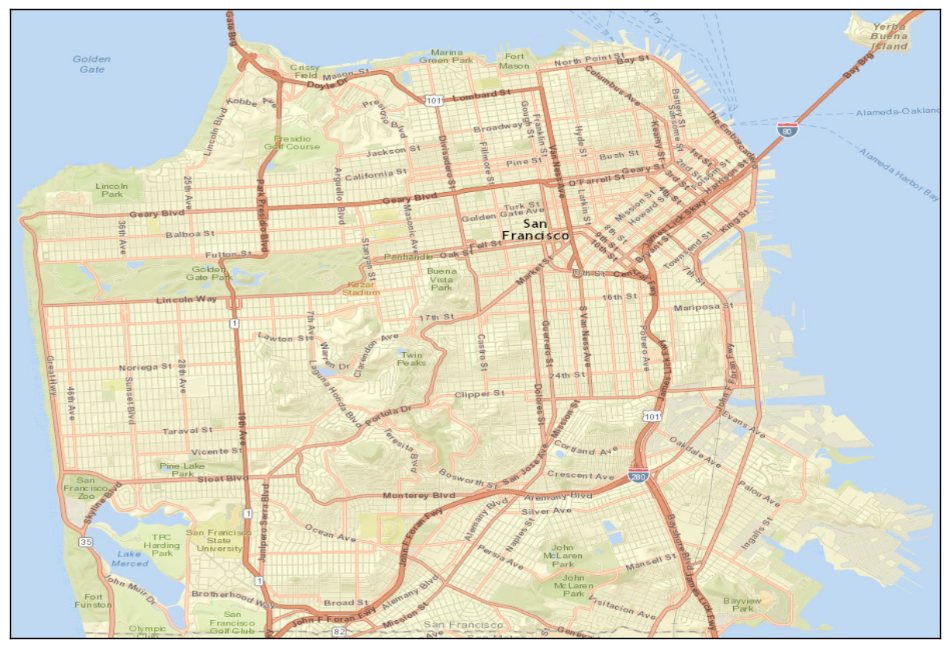

In [9]:
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 10))

# инициализируем прямоугольник карты Нью-Йорка
m = Basemap(llcrnrlat=MIN_LAT, urcrnrlat=MAX_LAT, llcrnrlon=MIN_LON, urcrnrlon=MAX_LON)

# отрисуем карту с помощью arcgisimage и World_Street_Map service
# для других видов карт можно задавать другое значение service
# список здесь - http://server.arcgisonline.com/ArcGIS/rest/services
m.arcgisimage(service='World_Street_Map', xpixels=1200)

# отметим Эмпайр-Стейт-Билдинг красным кругом
# m.plot(esb_long, esb_lat, marker='o', color='r')
# plt.text(esb_long, esb_lat, ' Empire State Building', fontsize=10,
#          fontweight='bold', ha='left', va='bottom', color='k')

# # построим сетку c логарифмической шкалой цветов
# plt.pcolormesh(lon_bins_2d, lat_bins_2d, trips_2d, alpha=0.5,
#                norm=colors.LogNorm(vmin=trips_2d.min(), vmax=trips_2d.max()),
#                cmap='RdPu')

# # добавим легенду
# cbar = plt.colorbar(orientation='vertical', shrink=0.625)
# cbar.set_label('Number of taxi trips', size=10)
plt.show();

In [10]:
data = data[(MIN_LON <= data['X']) & (data['X'] <= MAX_LON) & (MIN_LAT <= data['Y']) & (data['Y'] <= MAX_LAT)]

D:\soft\dev\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


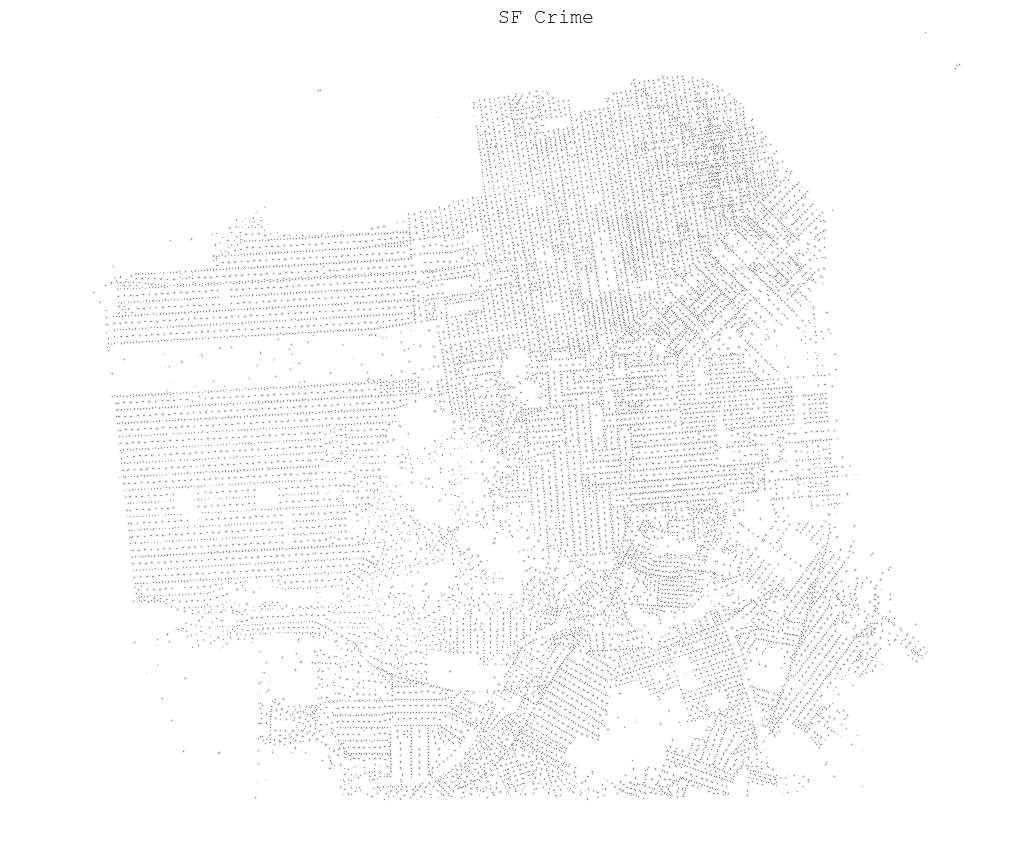

In [11]:
import matplotlib  
import matplotlib.pyplot as plt  
#Inline Plotting for Ipython Notebook 
%matplotlib inline 

pd.options.display.mpl_style = 'default' #Better Styling  
new_style = {'grid': False} #Remove grid
matplotlib.rc('axes', **new_style)
from matplotlib import rcParams  
rcParams['figure.figsize'] = (12, 10) #Size of figure  
rcParams['figure.dpi'] = 250

p = data.plot(kind='scatter', x='X', y='Y', color='black', s=.6, alpha=.2, xlim=(MIN_LON, MAX_LON), ylim=(MIN_LAT, MAX_LAT))
p.set_axis_bgcolor('white') # black #Background Color
plt.axis('off')
plt.title('SF Crime')
plt.show()

# Построить shapefile

In [12]:
(MAX_LAT - MIN_LAT) / (MAX_LON - MIN_LON)

0.6759296970456035

ImportError: DLL load failed: Не найден указанный модуль.

ValueError: shapefile must have lat/lon vertices  - it looks like this one has vertices
in map projection coordinates. You can convert the shapefile to geographic
coordinates using the shpproj utility from the shapelib tools
(http://shapelib.maptools.org/shapelib-tools.html)

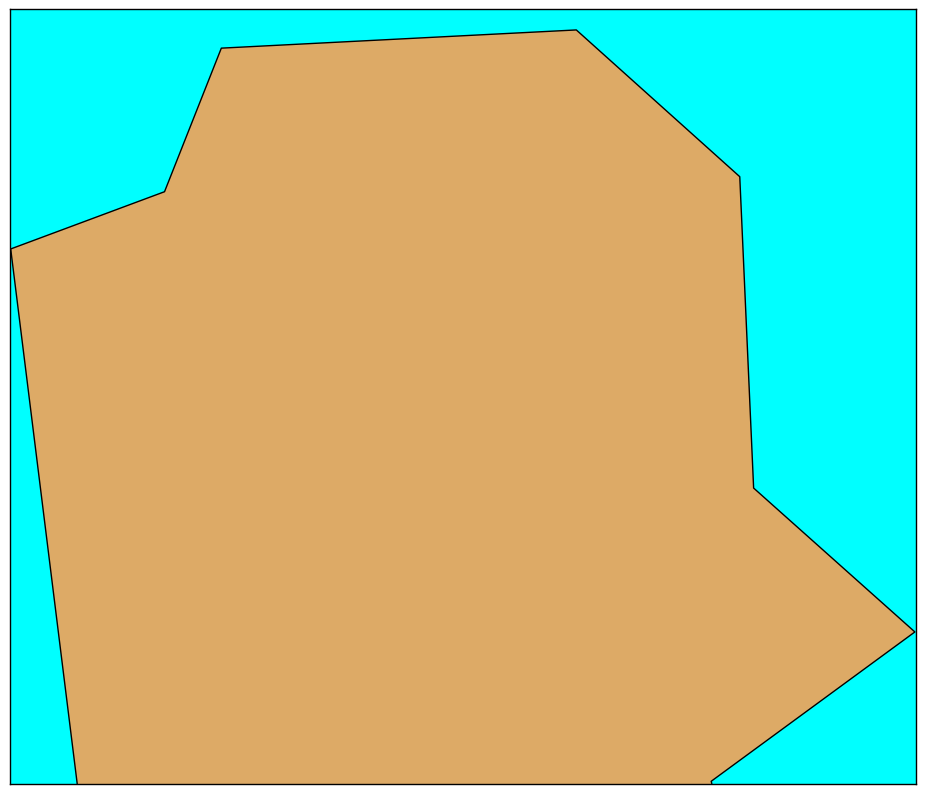

In [31]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# map = Basemap(llcrnrlon=-0.5,llcrnrlat=39.8,urcrnrlon=4.,urcrnrlat=43.,
#              resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = 1)

map = Basemap(llcrnrlat=MIN_LAT, urcrnrlat=MAX_LAT,
              llcrnrlon=MIN_LON, urcrnrlon=MAX_LON,
              projection='merc', resolution='i')

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#ddaa66',lake_color='aqua')
map.drawcoastlines()

# map.readshapefile('../sample_files/comarques', 'comarques')

map.readshapefile('./data/bay_area_cities', 'sf')

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as pl
import seaborn as sns

# Supplied map bounding box:
#    ll.lon     ll.lat   ur.lon     ur.lat
#    -122.52469 37.69862 -122.33663 37.82986
mapdata = np.loadtxt("../input/sf_map_copyright_openstreetmap_contributors.txt")
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]

z = zipfile.ZipFile('../input/train.csv.zip')
train = pd.read_csv(z.open('train.csv'))

#Get rid of the bad lat/longs
train['Xok'] = train[train.X<-121].X
train['Yok'] = train[train.Y<40].Y
train = train.dropna()
trainP = train[train.Category == 'PROSTITUTION'] #Grab the prostitution crimes
train = train[1:300000] #Can't use all the data and complete within 600 sec :(

#Seaborn FacetGrid, split by crime Category
g= sns.FacetGrid(train, col="Category", col_wrap=6, size=5, aspect=1/asp)

#Show the background map
for ax in g.axes:
    ax.imshow(mapdata, cmap=pl.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)
#Kernel Density Estimate plot
g.map(sns.kdeplot, "Xok", "Yok", clip=clipsize)

pl.savefig('category_density_plot.png')

#Do a larger plot with prostitution only
pl.figure(figsize=(20,20*asp))
ax = sns.kdeplot(trainP.Xok, trainP.Yok, clip=clipsize, aspect=1/asp)
ax.imshow(mapdata, cmap=pl.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)
pl.savefig('prostitution_density_plot.png')